In [1]:
!pip install langgraph "langchain[aws]"

In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages


In [3]:
class State(TypedDict):
    """State for the graph."""
    messages: Annotated[list, add_messages]
graph_builder = StateGraph(State)


In [4]:
from langgraph.checkpoint.memory import InMemorySaver

In [5]:
checkpointer = InMemorySaver()

In [6]:
from langchain.chat_models import init_chat_model
model = init_chat_model("anthropic.claude-3-5-sonnet-20240620-v1:0", model_provider="bedrock_converse")
def chatbot(state: State) -> State:
    """Chatbot function to handle messages."""
    # response = model.invoke(state["messages"])
    # print(response)
    # state["messages"].append(response)
    # return state
    return {"messages": [model.invoke(state["messages"])]}
graph_builder.add_node("chatbot", chatbot)


In [7]:
graph_builder.add_edge(START, "chatbot")
graph = graph_builder.compile(checkpointer=checkpointer)

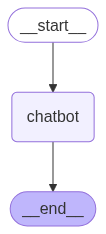

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
config = {
      "configurable": {
          # highlight-next-line
          "thread_id": "1"
      }
  }

In [10]:
def stream_graph_responses(user_input: str, config: dict = config) -> None:
    """Stream responses from the graph."""
    state = {"messages": [{"role": "user", "content": user_input}]}
    for response in graph.stream(state, config=config):
        print(response,"response bfore iterating values")
        for value in response.values():
            print(value)
            print("Assistant :", value["messages"][-1].content,end="")

In [11]:
user_input = "Give me a short description of the Eiffel Tower in one line."    
stream_graph_responses(user_input)


{'chatbot': {'messages': [AIMessage(content='Iconic iron lattice tower in Paris, France, standing 324 meters tall and attracting millions of visitors annually.', additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': '73f0a165-75ba-4bfc-bbd0-1560e2f483f1', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Sun, 29 Jun 2025 05:31:29 GMT', 'content-type': 'application/json', 'content-length': '295', 'connection': 'keep-alive', 'x-amzn-requestid': '73f0a165-75ba-4bfc-bbd0-1560e2f483f1'}, 'RetryAttempts': 0}, 'stopReason': 'end_turn', 'metrics': {'latencyMs': [826]}, 'model_name': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run--e2e361cb-4086-4a84-8c5c-a719f24e91c9-0', usage_metadata={'input_tokens': 23, 'output_tokens': 28, 'total_tokens': 51, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}})]}} response bfore iterating values
{'messages': [AIMessage(content='Iconic iron lattice tower in Paris, France, standing 324 meters tall and attracting millions o

In [12]:
user_input = "My name is Dinesh and i am a senior software engineer at purpose financial."
stream_graph_responses(user_input)

{'chatbot': {'messages': [AIMessage(content="Hello Dinesh! It's nice to meet you. As a senior software engineer at Purpose Financial, you must have a wealth of experience in the field. Is there anything specific you'd like to discuss or ask about related to your work, software engineering, or any other topic? I'm here to help if you have any questions or if you'd just like to chat about your experiences in the industry.", additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': '1cad3474-ac8d-4826-a894-c06f0ead564c', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Sun, 29 Jun 2025 05:32:45 GMT', 'content-type': 'application/json', 'content-length': '561', 'connection': 'keep-alive', 'x-amzn-requestid': '1cad3474-ac8d-4826-a894-c06f0ead564c'}, 'RetryAttempts': 0}, 'stopReason': 'end_turn', 'metrics': {'latencyMs': [2195]}, 'model_name': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run--ca16a6e1-cfe8-42a2-b246-7670f120a340-0', usage_metadata={'input_tokens': 71, 'o

In [13]:
user_input = "What is my name? Whats my profession?"
stream_graph_responses(user_input)

{'chatbot': {'messages': [AIMessage(content='Based on the information you provided:\n\nYour name is Dinesh.\n\nYour profession is Senior Software Engineer at Purpose Financial.', additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': '3a5dd222-721e-47da-b3ec-6b16d0c54a37', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Sun, 29 Jun 2025 05:33:08 GMT', 'content-type': 'application/json', 'content-length': '314', 'connection': 'keep-alive', 'x-amzn-requestid': '3a5dd222-721e-47da-b3ec-6b16d0c54a37'}, 'RetryAttempts': 0}, 'stopReason': 'end_turn', 'metrics': {'latencyMs': [844]}, 'model_name': 'anthropic.claude-3-5-sonnet-20240620-v1:0'}, id='run--2f4345ee-39c1-4e5b-a927-14ed783636bb-0', usage_metadata={'input_tokens': 170, 'output_tokens': 29, 'total_tokens': 199, 'input_token_details': {'cache_creation': 0, 'cache_read': 0}})]}} response bfore iterating values
{'messages': [AIMessage(content='Based on the information you provided:\n\nYour name is Dinesh.\n\nYour prof

In [18]:
pip install -U langgraph-checkpoint-redis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.3/152.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 28.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 25.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import START, StateGraph
from langgraph.graph.message import add_messages

DB_URI = "redis://localhost:6379"
from langgraph.checkpoint.redis import RedisSaver
from langchain.chat_models import init_chat_model

class State(TypedDict):
    """State for the graph."""
    messages: Annotated[list, add_messages]

def chatbot(state: State) -> State:
    """Chatbot function to handle messages."""
    # response = model.invoke(state["messages"])
    # print(response)
    # state["messages"].append(response)
    # return state
    return {"messages": [model.invoke(state["messages"])]}

model = init_chat_model("anthropic.claude-3-5-sonnet-20240620-v1:0", model_provider="bedrock_converse")

graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

config = {
        "configurable": {
            # highlight-next-line
            "thread_id": "1"
        }
    }


def stream_graph_responses(user_input: str, config: dict = config) -> None:
    """Stream responses from the graph."""
    state = {"messages": [{"role": "user", "content": user_input}]}
    for response in graph.stream(state, config=config):
        print(response,"response bfore iterating values")
        for value in response.values():
            print(value)
            print("Assistant :", value["messages"][-1].content,end="")

with RedisSaver.from_conn_string(DB_URI) as checkpointer:
    checkpointer.setup()
    
    graph_builder.add_edge(START, "chatbot")
    graph = graph_builder.compile(checkpointer=checkpointer)

    user_input = "I am a software engineer at purpose financial and my name is Dinesh."
    stream_graph_responses(user_input, config)

    user_input = "What is my name? Whats my profession?"
    stream_graph_responses(user_input, config)

    user_input = "who is my manager?"
    stream_graph_responses(user_input, config)

02:30:45 langgraph.checkpoint.redis INFO   Redis client is a standalone client
02:30:45 redisvl.index.index INFO   Index already exists, not overwriting.
02:30:45 redisvl.index.index INFO   Index already exists, not overwriting.
02:30:45 redisvl.index.index INFO   Index already exists, not overwriting.
02:30:45 langchain_aws.chat_models.bedrock_converse INFO   Using Bedrock Converse API to generate response
{'chatbot': {'messages': [AIMessage(content="I understand. To recap the information you've provided:\n\nYour name is Dinesh.\nYou are a software engineer at Purpose Financial.\n\nIs there anything specific you'd like to know or discuss about your role or the company? I'm here to help if you have any questions or need assistance with anything related to your work or other topics.", additional_kwargs={}, response_metadata={'ResponseMetadata': {'RequestId': 'a28f3019-3112-4f40-ba00-107b13e33438', 'HTTPStatusCode': 200, 'HTTPHeaders': {'date': 'Sun, 29 Jun 2025 06:30:48 GMT', 'content-t